# project1 : 주택 가격 예측

## 데이터

* scikit-learn에서 제공하는 캘리포니아 주택 가격 데이터
+ 1990년대 캘리포니아 지역의 주택 가격에 대한 데이터
* 총 20,640개의 관측값과 8개의 독립변수(feature), 1개의 종속변수(target)으로 구성됨

In [2]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)

In [5]:
df = data.frame # 표 형태로 바꾸기
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
# 데이터 전처리 : 결측값 확인
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

# 데이터 전처리 : 훈련 데이터와 평가 데이터로 분할 (7:3 비율)
california = fetch_california_housing()
X = california.data
y = california.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)+ 캘리포니아 주택 가격 데이터를 확인한 결과, 관측값은 20,640개, 변수는 9개로 나타남
+ 주택 가격에 영향을 미치는 특성은 다음과 같음
 + MedInc : 지역 중위 소득 (10,000 USD)
 + HouseAge : 주택 연식 (건축 후 경과된 연도 수)
 + AveRooms : 가구당 평균 방 개수
 + AveBedrms : 가구당 평균 침실 개수
 + Population : 지역 내 인구 수
 + AveOccup : 가구당 평균 거주 인원 수
 + Latitude : 위도
 + Longitude : 경도
 + MedHouseVal : 주택 중위 가격 (100,000 USD) 

In [19]:
# 데이터 전처리 : 훈련 데이터와 평가 데이터로 분할 (7:3 비율)
california = fetch_california_housing()
X = california.data
y = california.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 단위 : 달러
+ 표준편차 : 11만 
+ 중위 주택 가격의 평균 : 20만 
+ 중위 주택 가격 m : 1만 4천, q1 : 11만 9천, 중앙값 : 17만 9천, q3 : 26만,  M : 50만 

In [20]:
# 요약 통계량 확인
import pandas as pd
df_train = pd.DataFrame(data=X_train, columns=california.feature_names)
df_train['MedHouseVal'] = y_train
df_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,3.876892,28.575374,5.438125,1.098033,1427.927326,3.119236,35.650669,-119.584102,2.069240
std,1.904908,12.613634,2.453569,0.447498,1140.225190,12.373636,2.135742,2.002930,1.157492
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.567225,18.000000,4.448928,1.006783,791.000000,2.430380,33.940000,-121.800000,1.193000
50%,3.539100,29.000000,5.232422,1.049492,1168.000000,2.817147,34.270000,-118.510000,1.793000
75%,4.758075,37.000000,6.060692,1.100328,1727.000000,3.279135,37.720000,-118.010000,2.646000
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<AxesSubplot:xlabel='MedHouseVal', ylabel='Count'>

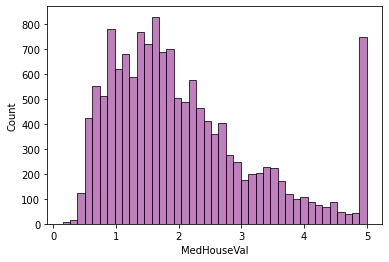

In [51]:
plt.figure(figsize=(6, 4))
sns.histplot(df_train['MedHouseVal'], color='purple', alpha=0.5)

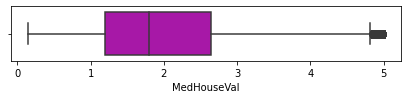

In [54]:
plt.figure(figsize=(7, 1))
sns.boxplot(x='MedHouseVal', color='m', data=df_train)
plt.show()

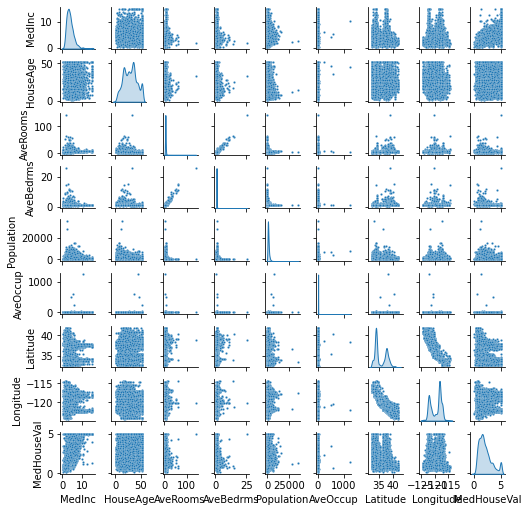

In [48]:
# 산점도
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df_train, height=0.8, plot_kws={'s': 5}, diag_kind='kde')
plt.show()

In [27]:
df_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02,1.93800
1,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09,1.69700
2,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14,2.59800
3,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00,1.36100
4,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45,5.00001
...,...,...,...,...,...,...,...,...,...
14443,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96,2.29200
14444,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43,0.97800
14445,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38,2.22100
14446,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96,2.83500


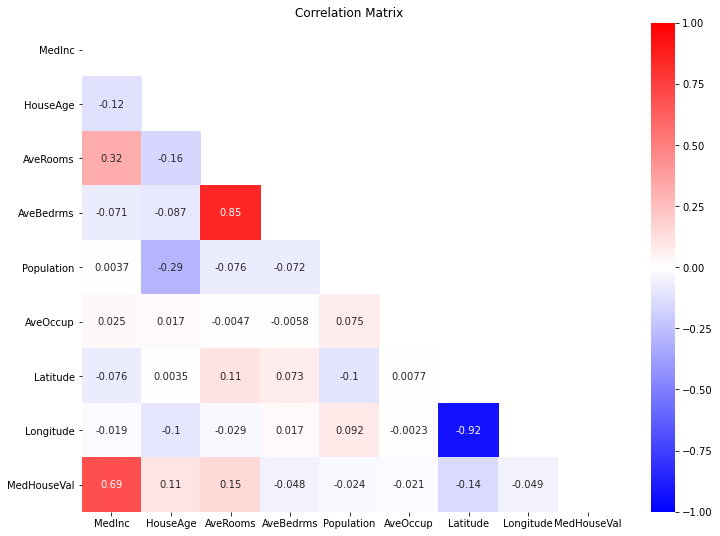

In [46]:
# 상관분석
import numpy as np
corr_train = df_train.corr()
upp_mat = np.triu(corr_train)

plt.figure(figsize=(12, 9))
sns.heatmap(corr_train, annot=True, mask=upp_mat, cmap='bwr', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

+ 중위 주택 가격은 지역 중위 소득과 강한 양의 상관관계 존재
+ 또한 주택 연식, 가구당 평균 방 개수, 위도 간에도 약한 양의 상관관계
+ 중위 주택 가격을 예측하는 특성으로 해당 변수 선택

In [73]:
# 상관관계가 강한 독립변수 선택
# scikit-learn에서 입력 데이터(feature)를 2차원 배열로 요구함
features = ['MedInc', 'HouseAge', 'AveRooms', 'Latitude']
target = 'MedHouseVal'

X_train = df_train[features]
y_train = df_train[target]

In [74]:
# 평가 데이터에서도 훈련 데이터에서 사용한 독립변수만 선택
df_test = pd.DataFrame(data=X_test, columns=california.feature_names)
df_test['MedHouseVal'] = y_test
X_test = df_test[features]

In [75]:
# 선형 회귀모델 생성 및 학습
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# 회귀모델 평가 : 결정계수, MSE
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
R2 = r2_score(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"결정계수 : {R2:.3f}")
print(f"RMSE : {RMSE:.3f}")

결정계수 : 0.520
RMSE : 0.794


In [78]:
# 회귀계수
df_coef = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
(df_coef)

,Feature,Coefficient
0,MedInc,0.435658
1,HouseAge,0.016937
2,AveRooms,-0.019505
3,Latitude,-0.045071


+ 회귀계수를 살펴보면 지역 중위 소득이 1만 달러 증가할수록 중위 주택 가격은 4만 3천 달러 증가하는 것으로 나타남. 이는 경제적으로 여유가 있을수록 좋은 집에 거주함을 경햐이 있음을 보임 
+ 주택 연식이 1년 증가하면 중위 주택 가격은 1693달러 증가하는 것으로 나타남
+ 가구당 평균 방 개수가 1개 증가하면 중위주택 가격은 1950달러 감소함
+ 위도가 1도 증가하면 중위 주택 가격은 4507달러 감소하는 경향이 있음. 이는 일반적으로 캘리포니아주는 남부 지역이 상대적으로 대도시가 많아 주택 가격이 더 높은 것을 반영하는 것으로 판단됨

In [82]:
# statsmodels 라이브러리 설치
#!pip install statsmodels

In [85]:
# [참고] 회귀계수의 유의성
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     3890.
Date:                Thu, 24 Jul 2025   Prob (F-statistic):               0.00
Time:                        11:50:47   Log-Likelihood:                -17332.
No. Observations:               14448   AIC:                         3.467e+04
Df Residuals:                   14443   BIC:                         3.471e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6091      0.115     13.957      0.0

In [86]:
X_test = X_test[features]

y_pred = model.predict(X_test)
# RMSE, 결정계수
from sklearn.metrics import mean_squared_error, r2_score
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
R2 = r2_score(y_test, y_pred)

+ RMSE는 0.794로, 주택 중위 가격의 실제값과 예측값이 평균적으로 약 8만 달러 차이가 있다는 것을 의미함
+ 학습 데이터에서 주택 중위 가격의 평균이 약 20만 달러인 점을 고려하면, 모델의 평균 오차는 약 30% 수준임을 알 수 있음
+ 따라서 평균 오차가 비교적 큰 편이므로, 모델 성능 개선이 필요한 것으로 판단됨
+ 결정계수는 52.0%로 나타남

In [87]:
import seaborn as sns

In [108]:
df = sns.load_dataset("iris")

In [109]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [111]:
# 
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [114]:
X = df.drop(columns = "species")
y = df["species"]

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Text(0, 0.5, '')

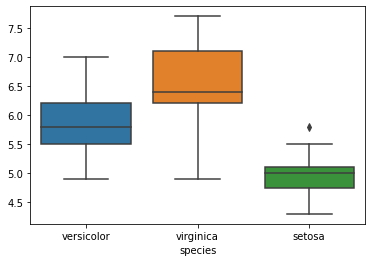

In [117]:
df_train = pd.concat([X_train, y_train], axis=1)

sns.boxplot(x='species', y='sepal_length', data=df_train)
plt.ylabel('')

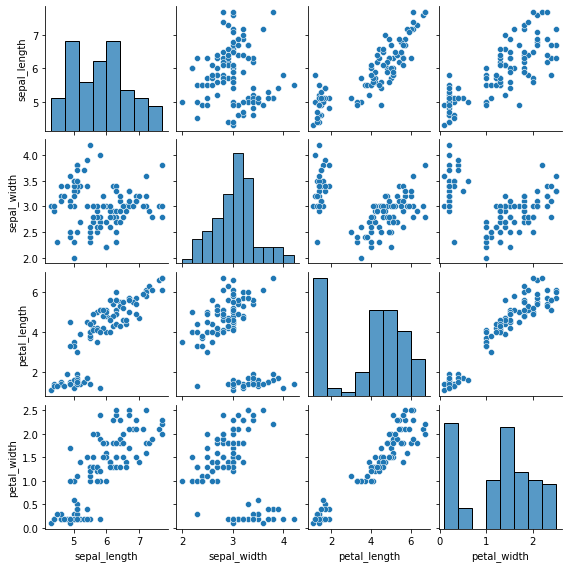

In [118]:
sns.pairplot(X_train, height=2)

Text(0, 0.5, '')

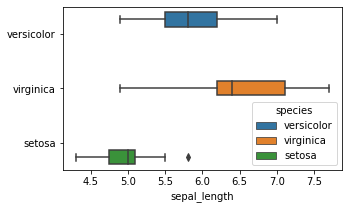

In [119]:
plt.figure(figsize=(5, 3))
sns.boxplot(y='species', x='sepal_length', hue='species', data=df_train)
plt.ylabel('')

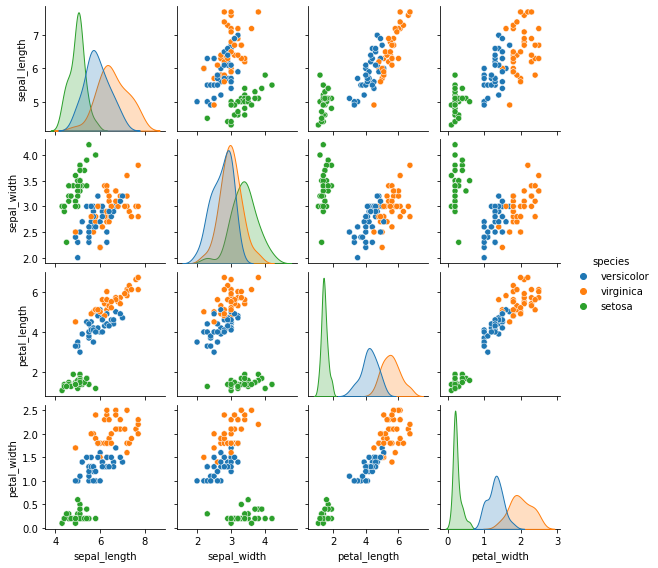

In [120]:
sns.pairplot(df_train, hue='species', height=2)

In [141]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_range = range(1, 20, 2)
k_score = []

for k in k_range(1, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    print(f'k={k}일 때 정확도 : {scores.mean():.3f}')

TypeError: 'range' object is not callable

In [127]:
best_k = k_range[k_scores.index(max(k_scores))]
print(f"최적의 k의 값은 {best_k}이며, 평균 정확도는 {max(k_scores):.3f}")

SyntaxError: EOL while scanning string literal (<ipython-input-127-464914cff1ed>, line 2)

In [132]:
knn = from sklearn.neighbors import KNeighborsClassifier(n_neighbors=k)
knn.flt(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

SyntaxError: invalid syntax (<ipython-input-132-478f26fe98a6>, line 1)